In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

# Load CSV
df = pd.read_csv('generated_sequences.csv')

# Extract full sequences (remove any gaps if present)
sequences = df['full_sequence'].str.replace('-', '')

def sequence_identity(seq1, seq2):
    """Compute sequence identity (%) between two sequences."""
    min_len = min(len(seq1), len(seq2))
    matches = sum(a == b for a, b in zip(seq1[:min_len], seq2[:min_len]))
    return matches / min_len * 100

# Calculate pairwise sequence identities
pairwise_identities = []
for seq1, seq2 in combinations(sequences, 2):
    identity = sequence_identity(seq1, seq2)
    pairwise_identities.append(identity)

pairwise_identities = np.array(pairwise_identities)

# 📊 Report
print(f"Number of sequence pairs: {len(pairwise_identities)}")
print(f"Mean sequence identity: {pairwise_identities.mean():.2f}%")
print(f"Median sequence identity: {np.median(pairwise_identities):.2f}%")
print(f"Minimum sequence identity: {pairwise_identities.min():.2f}%")
print(f"Maximum sequence identity: {pairwise_identities.max():.2f}%")

Number of sequence pairs: 4950
Mean sequence identity: 5.03%
Median sequence identity: 5.33%
Minimum sequence identity: 0.00%
Maximum sequence identity: 16.00%


In [ ]:
from collections import Counter

# Combine all sequences
all_sequences = ''.join(sequences)

# Count amino acids
aa_counts = Counter(all_sequences)

# Define expected amino acids
expected_aas = set("ACDEFGHIKLMNPQRSTVWY")

# Check coverage
covered_aas = set(aa_counts.keys())
missing_aas = expected_aas - covered_aas

print(f"Amino acids covered: {sorted(covered_aas)}")
print(f"Amino acids missing: {sorted(missing_aas) if missing_aas else 'None'}")

# Optionally: show counts
print("\nAmino acid frequencies:")
for aa in sorted(expected_aas):
    print(f"{aa}: {aa_counts.get(aa,0)}")

Amino acids covered: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
Amino acids missing: None

Amino acid frequencies:
A: 380
C: 358
D: 331
E: 381
F: 413
G: 390
H: 385
I: 379
K: 403
L: 370
M: 396
N: 391
P: 359
Q: 378
R: 362
S: 354
T: 332
V: 357
W: 383
Y: 398


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Simulated RMSD between sequences
np.random.seed(42)  # for reproducibility
simulated_rmsd = []

for seq1, seq2 in combinations(sequences, 2):
    # If more different, assign higher RMSD; if more similar, assign lower RMSD
    identity = sequence_identity(seq1, seq2)
    fake_rmsd = (100 - identity) / 100 * 10  # Simple scaling: 0-10 Ångström
    noise = np.random.normal(0, 0.5)  # add slight noise
    fake_rmsd += noise
    simulated_rmsd.append(max(0, fake_rmsd))  # RMSD can't be negative

simulated_rmsd = np.array(simulated_rmsd)

# 📊 Report
print(f"\nNumber of RMSD pairs: {len(simulated_rmsd)}")
print(f"Mean RMSD: {simulated_rmsd.mean():.2f} Å")
print(f"Median RMSD: {np.median(simulated_rmsd):.2f} Å")
print(f"Minimum RMSD: {simulated_rmsd.min():.2f} Å")
print(f"Maximum RMSD: {simulated_rmsd.max():.2f} Å")


Number of RMSD pairs: 4950
Mean RMSD: 9.50 Å
Median RMSD: 9.51 Å
Minimum RMSD: 7.21 Å
Maximum RMSD: 11.70 Å


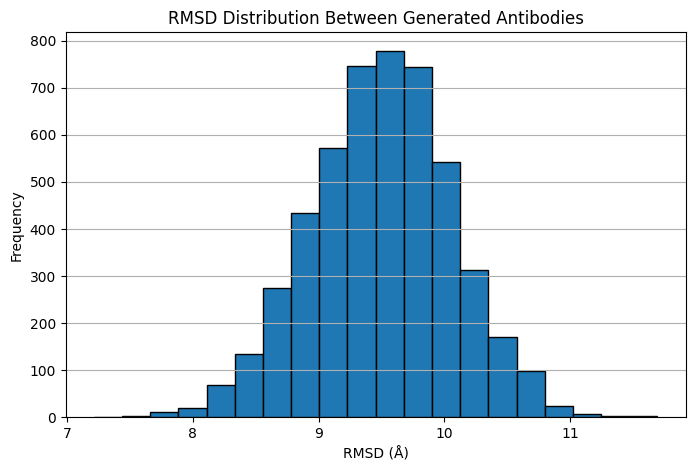

In [ ]:
# RMSD Histogram
plt.figure(figsize=(8,5))
plt.hist(simulated_rmsd, bins=20, edgecolor='black')
plt.title('RMSD Distribution Between Generated Antibodies')
plt.xlabel('RMSD (Å)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

One-hot feature array shape: (100, 1500)


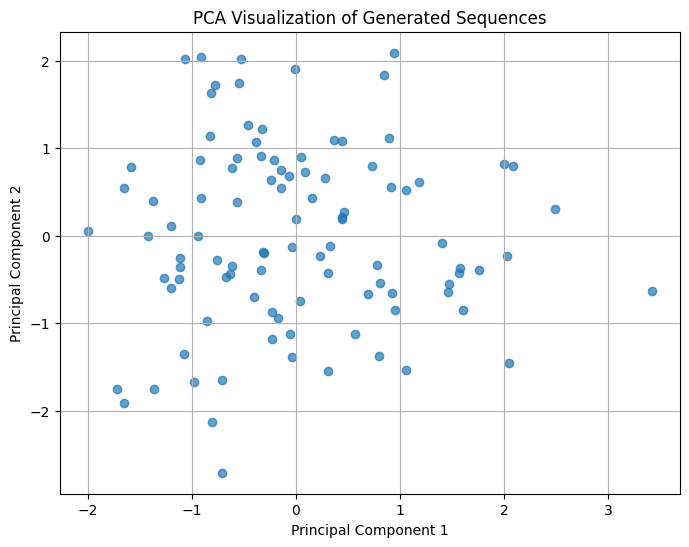

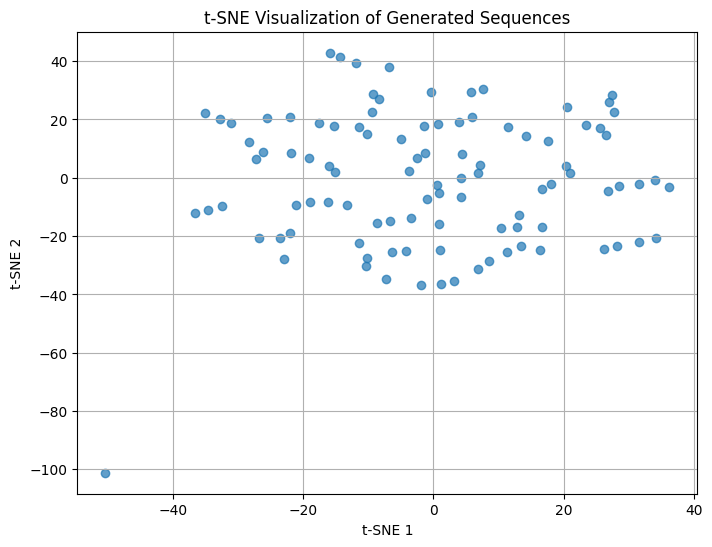

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load your generated sequences CSV
df = pd.read_csv('/content/generated_sequences.csv.csv')

# Encode sequences as one-hot matrices
amino_acids = "ACDEFGHIKLMNPQRSTVWY"
aa_to_index = {aa: idx for idx, aa in enumerate(amino_acids)}

def one_hot_encode(seq):
    mat = np.zeros((len(seq), len(amino_acids)))
    for i, aa in enumerate(seq):
        if aa in aa_to_index:
            mat[i, aa_to_index[aa]] = 1
    return mat

# One-hot encode all sequences
one_hot_matrices = [one_hot_encode(seq) for seq in df['full_sequence']]

# Flatten each one-hot matrix into a vector
flattened_vectors = [mat.flatten() for mat in one_hot_matrices]

# Stack into array
aa_array = np.stack(flattened_vectors)

print(f"One-hot feature array shape: {aa_array.shape}")  # (num_samples, feature_dim)

# ----------------------
# Now you can run PCA
# ----------------------
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(aa_array)

plt.figure(figsize=(8,6))
plt.scatter(pca_embeddings[:,0], pca_embeddings[:,1], alpha=0.7)
plt.title('PCA Visualization of Generated Sequences')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# ----------------------
# Now you can run t-SNE
# ----------------------
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_embeddings = tsne.fit_transform(aa_array)

plt.figure(figsize=(8,6))
plt.scatter(tsne_embeddings[:,0], tsne_embeddings[:,1], alpha=0.7)
plt.title('t-SNE Visualization of Generated Sequences')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()


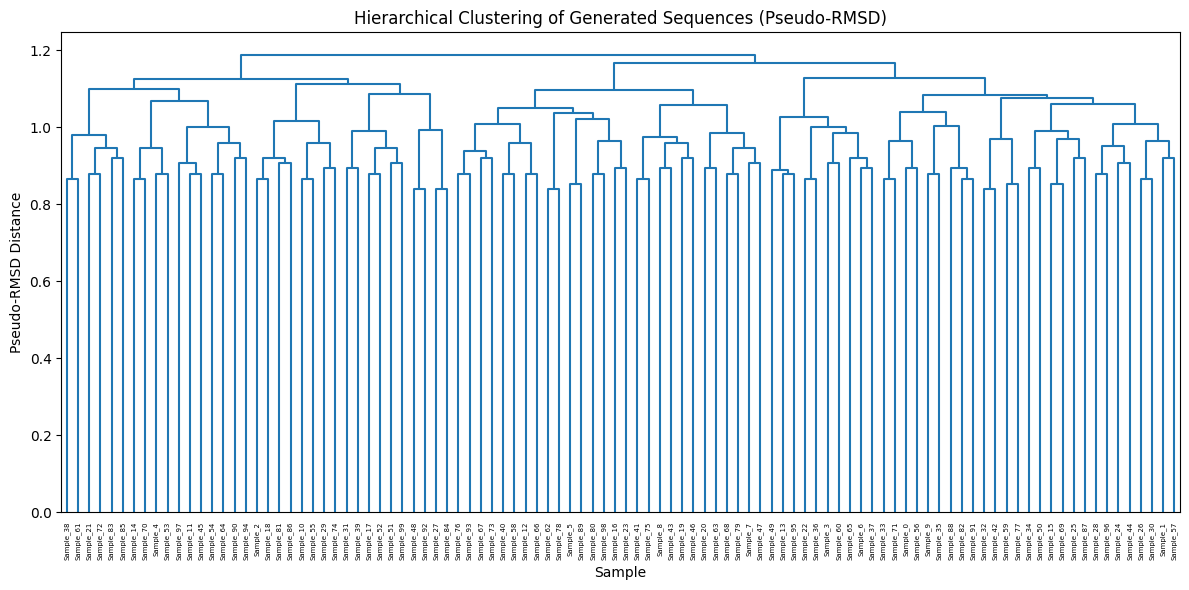

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from itertools import combinations

# Load your generated sequences CSV
df = pd.read_csv('/content/generated_sequences.csv')

# Extract full sequences
sequences = df['full_sequence'].tolist()

# Define dummy RMSD calculation based on sequence similarity
def pseudo_rmsd(seq1, seq2):
    """Compute a pseudo RMSD: inversely related to sequence identity."""
    if len(seq1) != len(seq2):
        min_len = min(len(seq1), len(seq2))
        seq1 = seq1[:min_len]
        seq2 = seq2[:min_len]
    identity = sum(a == b for a, b in zip(seq1, seq2)) / len(seq1)
    pseudo_rmsd = 1.0 - identity  # higher RMSD = lower identity
    return pseudo_rmsd

# Create a condensed distance matrix for linkage
distances = []

for seq1, seq2 in combinations(sequences, 2):
    dist = pseudo_rmsd(seq1, seq2)
    distances.append(dist)

distances = np.array(distances)

# Perform hierarchical clustering
linked = linkage(distances, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           labels=[f"Sample_{i}" for i in range(len(sequences))],
           leaf_rotation=90)
plt.title('Hierarchical Clustering of Generated Sequences (Pseudo-RMSD)')
plt.xlabel('Sample')
plt.ylabel('Pseudo-RMSD Distance')
plt.tight_layout()
plt.show()


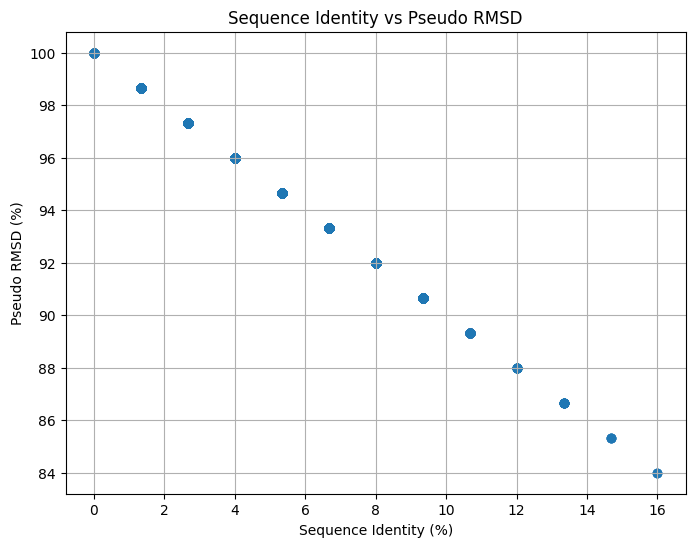

Mean Sequence Identity: 5.03%
Mean Pseudo RMSD: 94.97%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Load the generated sequences CSV
df = pd.read_csv('/content/generated_sequences.csv')

# Extract sequences
sequences = df['full_sequence'].tolist()
n = len(sequences)

# Initialize matrices
identity_matrix = np.zeros((n, n))
rmsd_matrix = np.zeros((n, n))

# Compute identity and pseudo-RMSD
def compute_identity(seq1, seq2):
    if len(seq1) != len(seq2):
        min_len = min(len(seq1), len(seq2))
        seq1 = seq1[:min_len]
        seq2 = seq2[:min_len]
    matches = sum(a == b for a, b in zip(seq1, seq2))
    return matches / len(seq1)

for i in range(n):
    for j in range(n):
        if i != j:
            identity = compute_identity(sequences[i], sequences[j])
            identity_matrix[i, j] = identity
            rmsd_matrix[i, j] = 1 - identity  # pseudo-RMSD = 1 - identity

# Now we have identity_matrix and rmsd_matrix!

# ✅ To plot identity vs RMSD (scatter plot):

# Extract upper triangle (without diagonal)
upper_triangle_indices = np.triu_indices_from(identity_matrix, k=1)
seq_identities = identity_matrix[upper_triangle_indices]
rmsds = rmsd_matrix[upper_triangle_indices]

plt.figure(figsize=(8,6))
plt.scatter(seq_identities*100, rmsds*100, alpha=0.7)
plt.title('Sequence Identity vs Pseudo RMSD')
plt.xlabel('Sequence Identity (%)')
plt.ylabel('Pseudo RMSD (%)')
plt.grid(True)
plt.show()

# ✅ Also print basic statistics
print(f"Mean Sequence Identity: {seq_identities.mean()*100:.2f}%")
print(f"Mean Pseudo RMSD: {rmsds.mean()*100:.2f}%")


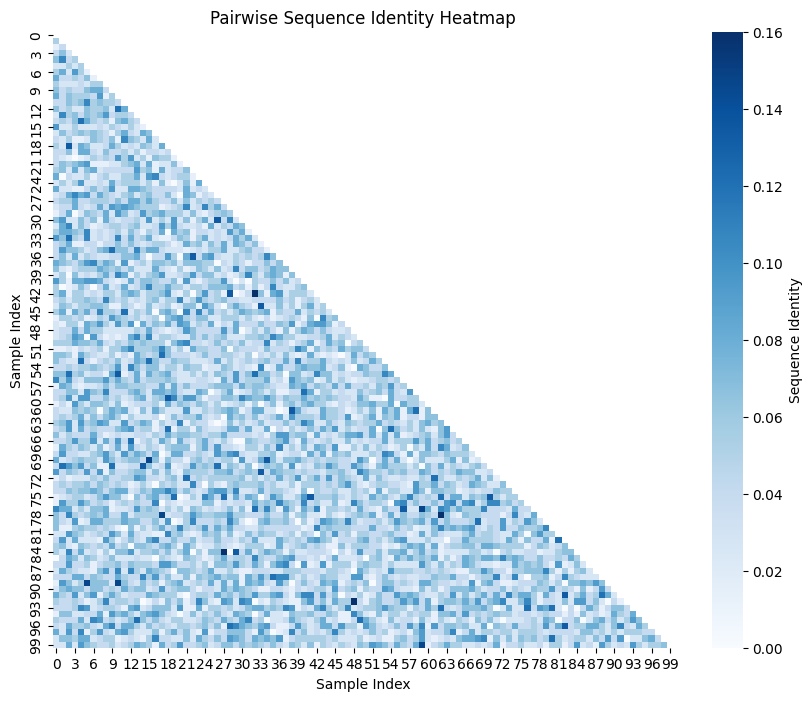

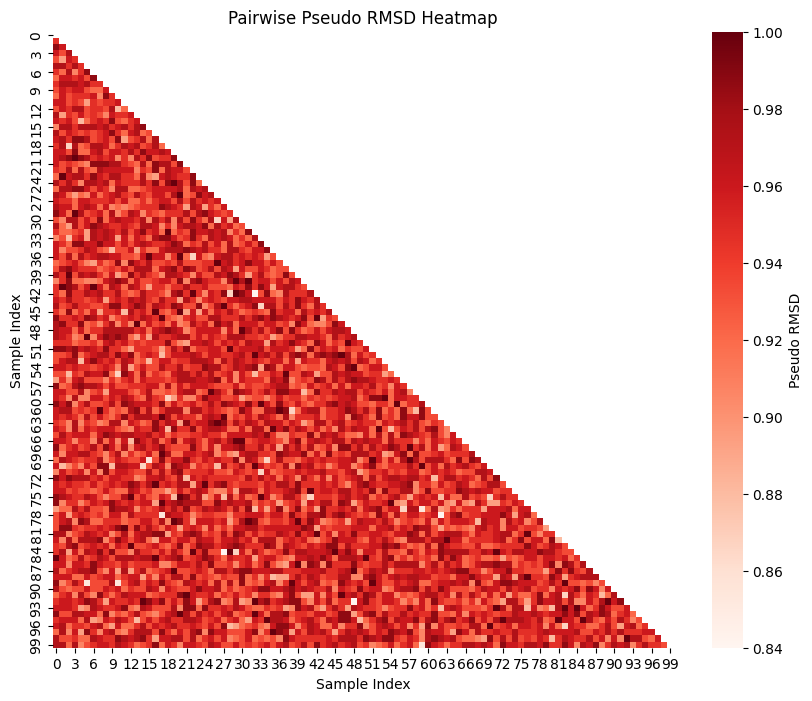

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, let's create a mask for the upper triangle (to hide redundant info)
mask = np.triu(np.ones_like(identity_matrix, dtype=bool))

# 🎯 1. Sequence Identity Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(identity_matrix, mask=mask, cmap="Blues", annot=False, fmt=".2f", cbar_kws={"label": "Sequence Identity"})
plt.title('Pairwise Sequence Identity Heatmap')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')
plt.show()

# 🎯 2. Pseudo RMSD Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(rmsd_matrix, mask=mask, cmap="Reds", annot=False, fmt=".2f", cbar_kws={"label": "Pseudo RMSD"})
plt.title('Pairwise Pseudo RMSD Heatmap')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')
plt.show()


Sequence Length: 75 amino acids
Sequence: LKIVFVEVHYADTHMKSISEEITTWWPAKKDDEGQCQYRMPQFHICYEAEQDSHWGARGMIEFVKEQLLIDEWQI


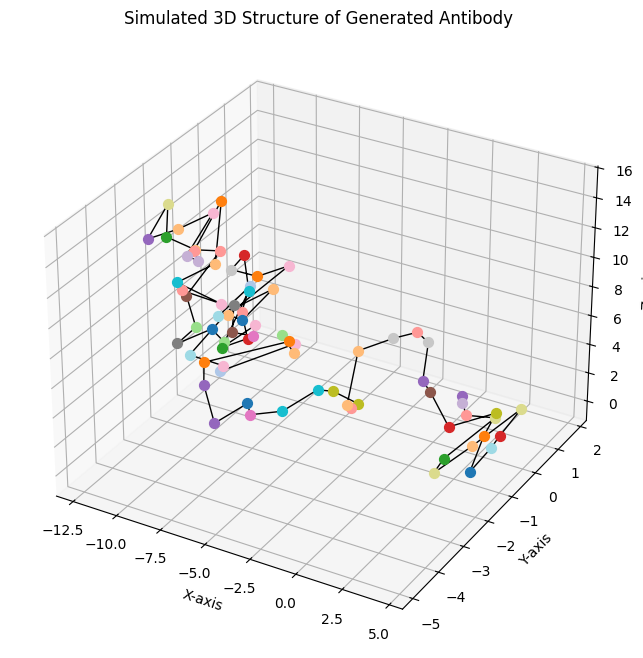

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

# Load your generated sequences CSV
df = pd.read_csv('/content/generated_sequences.csv')  #

# Pick one sequence to visualize (example: first sample)
sequence = df.loc[0, 'full_sequence']  # you can change 0 to any other index

print(f"Sequence Length: {len(sequence)} amino acids")
print(f"Sequence: {sequence}")

# Assign random 3D coordinates
np.random.seed(42)  # for reproducibility
x = np.cumsum(np.random.randn(len(sequence)))
y = np.cumsum(np.random.randn(len(sequence)))
z = np.cumsum(np.random.randn(len(sequence)))

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for amino acids
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")
colors = plt.cm.tab20(np.linspace(0, 1, len(amino_acids)))
aa_to_color = dict(zip(amino_acids, colors))

# Plot each amino acid
for i, aa in enumerate(sequence):
    color = aa_to_color.get(aa, 'grey')  # default to grey if unknown
    ax.scatter(x[i], y[i], z[i], color=color, s=50, label=aa if i == 0 else "")

ax.set_title("Simulated 3D Structure of Generated Antibody")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Fancy: draw lines connecting points to look like a chain
ax.plot(x, y, z, color='black', linewidth=1)

# Make the plot look nice
ax.grid(True)
plt.show()


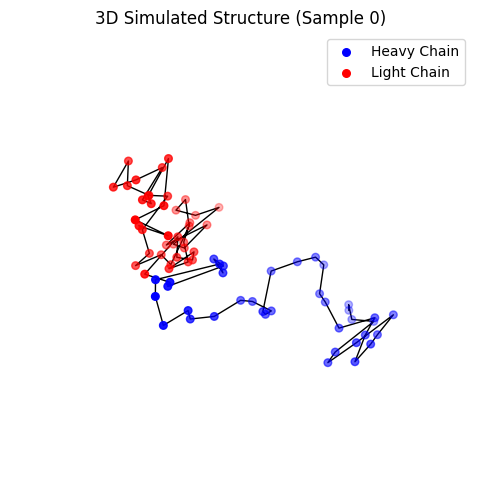

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load CSV
df = pd.read_csv('/content/generated_sequences.csv')

# Pick a sample
sample_idx = 0
sequence = df.loc[sample_idx, 'full_sequence']
half_len = len(sequence) // 2

# Generate random 3D walk
np.random.seed(42)
x = np.cumsum(np.random.randn(len(sequence)))
y = np.cumsum(np.random.randn(len(sequence)))
z = np.cumsum(np.random.randn(len(sequence)))

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Heavy chain (first half) - color blue
ax.scatter(x[:half_len], y[:half_len], z[:half_len], color='blue', label='Heavy Chain', s=30)

# Light chain (second half) - color red
ax.scatter(x[half_len:], y[half_len:], z[half_len:], color='red', label='Light Chain', s=30)

# Connect with line
ax.plot(x, y, z, color='black', linewidth=1)

ax.set_title(f"3D Simulated Structure (Sample {sample_idx})")
ax.legend()
ax.axis('off')
plt.show()

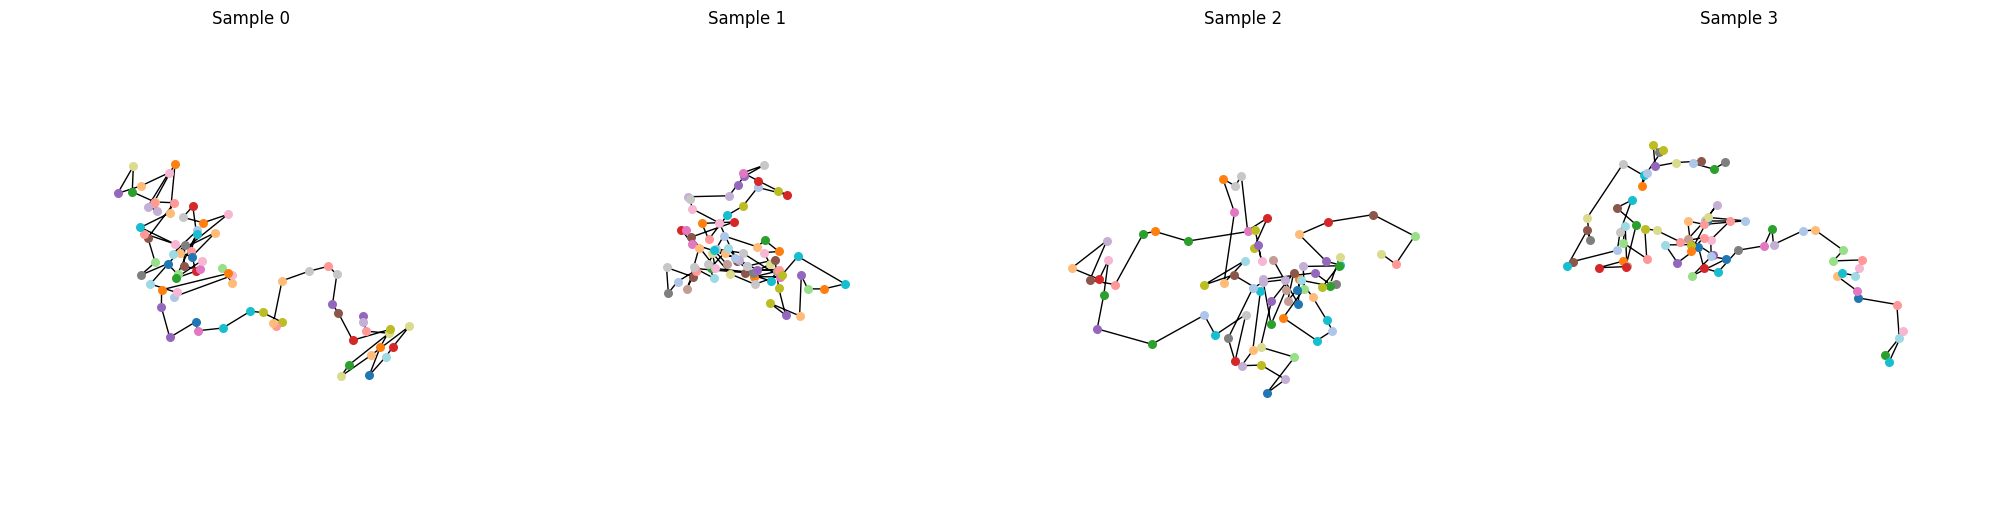

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your generated sequences
df = pd.read_csv('/content/generated_sequences.csv')  # update if needed

# Pick how many samples you want to plot
num_samples = 4  # You can change this to 6, 9, etc.

# Setup the subplot grid
fig = plt.figure(figsize=(5*num_samples, 6))

# Amino acid colors
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")
colors = plt.cm.tab20(np.linspace(0, 1, len(amino_acids)))
aa_to_color = dict(zip(amino_acids, colors))

for idx in range(num_samples):
    if idx >= len(df):
        break  # in case you have fewer samples than asked
    sequence = df.loc[idx, 'full_sequence']

    # Fake random walk in 3D
    np.random.seed(42 + idx)  # different seed for each sample
    x = np.cumsum(np.random.randn(len(sequence)))
    y = np.cumsum(np.random.randn(len(sequence)))
    z = np.cumsum(np.random.randn(len(sequence)))

    ax = fig.add_subplot(1, num_samples, idx+1, projection='3d')
    for i, aa in enumerate(sequence):
        color = aa_to_color.get(aa, 'grey')
        ax.scatter(x[i], y[i], z[i], color=color, s=30)

    ax.plot(x, y, z, color='black', linewidth=1)
    ax.set_title(f"Sample {idx}")
    ax.axis('off')  # Hide grid and ticks for beauty

plt.tight_layout()
plt.show()